<a href="https://colab.research.google.com/github/MansiKaushik123/CODSOFT--MOVIE-RATING-PREDICTION-WITH-PYTHON/blob/main/CODSOFT_MOVIE_RATING_PREDICTION_WITH_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - MOVIE RATING PREDICTION WITH PYTHON


# **codsoft data science internship**

**Name** : Mansi kaushik

**Batch** :  JULY BATCH A61

**Domain** : Data science

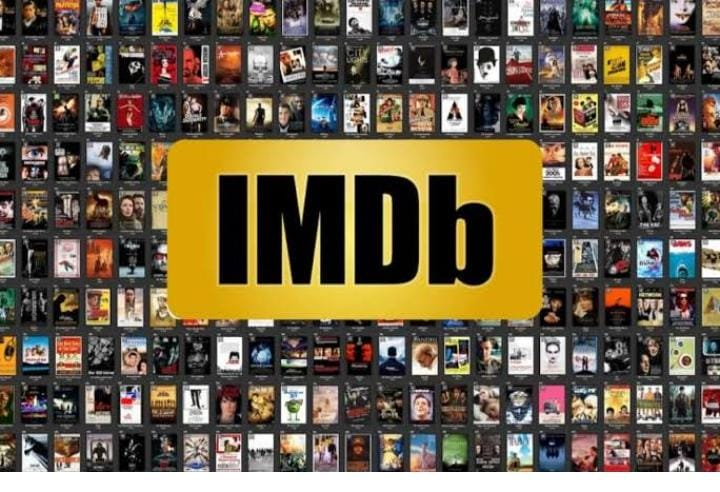

# **Project Summary -**

**1.** MOVIE RATING PREDICTION WITH PYTHON
Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

**2.** The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

**3.** Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

# **GitHub Link -**


Provide your GitHub Link here.
https://github.com/MansiKaushik123/CODSOFT--MOVIE-RATING-PREDICTION-WITH-PYTHON

# ***Objective***:


Develop a machine learning model to predict the ratings of movies based on various features using Python.


# **Project Description:**


The movie industry relies heavily on predicting the success of films to make informed business decisions. A predictive model that can accurately forecast movie ratings can be invaluable for production houses, distributors, and streaming services. This project involves building a machine learning model to predict movie ratings based on historical data.

# **Let's Begin !**

# Import Libraries

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
movie_data = pd.read_csv("/content/IMDb Movies India.csv.zip", encoding="latin1")
movie_data

# Dataset First View

In [ ]:
movie_data.head()

In [ ]:
movie_data.info()

In [ ]:
movie_data.describe()

# **Data Cleaning**


In [ ]:
# check missing value or NULL values
movie_data.isnull().sum()


In [ ]:
movie_data.dropna(subset=["Rating"], inplace = True)

In [ ]:
movie_data.isnull().sum()

In [ ]:
movie_data.dropna(subset=['Actor 1','Actor 2','Actor 3','Director','Genre'],inplace=True)

In [ ]:
movie_data.isnull().sum()

In [ ]:
movie_data.head()

# **convert votes to integer and remove commas and convert year (2019) to 2019 and remove min from duration columns**

# convert votes columns

In [ ]:
movie_data['Votes'] = movie_data['Votes'].str.replace(',','').astype(int)

# convert year columns

In [ ]:
movie_data['Year'] = movie_data['Year'].str.strip('()').astype(int)

#  convert duration columns

In [ ]:
movie_data['Duration'] = movie_data['Duration'].str.strip(('min'))

In [ ]:
movie_data['Duration'].fillna(movie_data['Duration'].median(),inplace=True)

In [ ]:
movie_data.isnull().sum()

In [ ]:
movie_data.info()

In [ ]:
movie_data.head()


Now data are clean and inputed.


# **2. EDA (Exploratory data Analysis)**

**Now we are finding top 10 movies based on rating**


In [ ]:
top_movie = movie_data.loc[movie_data['Rating'].sort_values(ascending=False)[:10].index]
top_movie

**Distribution of Top 10 movies rating and Year**

In [ ]:
sns.histplot(data= top_movie,x='Year',hue='Rating',multiple='stack')
plt.title('Distribution of Top 10 Movies', fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.tight_layout()
plt.show()


**Distribution of Genre of movies**

In [ ]:
genre_counts = movie_data['Genre'].value_counts().reset_index()
genre_counts.columns = ['Genre','Count']

In [ ]:
# Select the top N genres (e.g., top 5)
top_n_genres = genre_counts.head(5)
top_n_genres

In [ ]:
plt.figure(figsize=(4, 4))
plt.pie(top_n_genres['Count'], labels=top_n_genres['Genre'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Movie Genre Distribution', fontsize=16)
plt.axis('equal')
plt.show()

# **The distribution of top directors by average rating means looking at how directors are ranked based on the average ratings of their films.**

In [ ]:
# Group the data by director and calculate the average rating
director_avg_rating = movie_data.groupby('Director')['Rating'].mean().reset_index()



In [ ]:
director_avg_rating = director_avg_rating.sort_values(by='Rating', ascending=False)

In [ ]:
top_directors = director_avg_rating.head(10)
top_directors

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_directors, x='Rating', y='Director', palette='viridis')

plt.title('Top Directors by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Director', fontsize=14)

plt.show()

# **Line plot between the number of votes and movie rating**

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(data=movie_data,x ='Rating',y='Votes')
plt.title('Votes vs. Rating',fontsize=16)
plt.xlabel('Rating',fontsize=14)
plt.ylabel('Votes', fontsize=14)

plt.show()

# **Distribution of top actors  number of movie**

In [ ]:
actor_counts = movie_data['Actor 1'].value_counts().reset_index()
actor_counts.columns = ['Actor', 'MovieCount']

top_n_actors = actor_counts.head(10)
top_n_actors


In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_n_actors, x='MovieCount', y='Actor', orient='h')

# Set plot labels and title
plt.title('Top Actors by Number of Movies', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Actor', fontsize=14)

# Show the plot
plt.show()

# **Distribution of number of movie released every year**

In [ ]:
yearly_movie_counts = movie_data['Year'].value_counts().reset_index()
yearly_movie_counts.columns = ['Year', 'MovieCount']

yearly_movie_counts = yearly_movie_counts.sort_values(by='Year')
yearly_movie_counts

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_movie_counts, x='Year', y='MovieCount')

plt.title('Number of Movies Released Every Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Movies Released', fontsize=14)

plt.show()



# **Distribution of Movies with rating greater than 8 and votes greater than 10000**

In [ ]:
filtered_df = movie_data[(movie_data['Rating']>8) & (movie_data['Votes']>1000)]
filtered_df.head(10)

In [ ]:
plt.figure(figsize=(15, 6))
ax=sns.barplot(data=filtered_df,x='Name',y='Votes',hue='Rating',dodge=False,width=0.5,palette='muted')

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.legend(loc='upper right')
ax.set_xlabel('Movie Name')
ax.set_ylabel('Votes')
ax.set_title('Movies with rating greater than 8 and votes greater than 10000')

plt.show()


# **Distribution of Durations of movies by years**

In [ ]:
movie_data['Duration'] = movie_data['Duration'].astype(int)
movie_data['Year'] = movie_data['Year'].astype(int)


plt.figure(figsize=(12, 6))
sns.lineplot(data=movie_data,x='Year',y='Duration',errorbar=None)
plt.xlabel('Year')
plt.ylabel('Duration in minutes')
plt.title('Duration of movies by year')
plt.xticks(np.arange(1917,2023,5))
plt.show()

# **Distribution of Number of movies each genre**

In [ ]:
movie_data['Genre'] = movie_data['Genre'].str.split(',')
#create a new dataframe with one row for each genre
genre_df = movie_data.explode('Genre')
genre_df

In [ ]:

plt.figure(figsize=(12, 6))
sns.countplot(data=genre_df, x='Genre', order=genre_df['Genre'].value_counts().index, palette='viridis')

plt.title('Number of Movies for Each Genre', fontsize=16)
plt.xlabel('Number of Movies', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.xticks(rotation=90)

plt.show()

# **Distribution of Average rating of movies in each genre**

In [ ]:
average_rating_by_genre = genre_df.groupby('Genre')['Rating'].mean().reset_index()
average_rating_by_genre = average_rating_by_genre.sort_values(by='Rating', ascending=False)

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=average_rating_by_genre,y="Rating",x='Genre',palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average rating of movies in each genre')
plt.xticks(rotation=90)

plt.show()

# **Featured Engineering**